In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sys
import argparse
import h5py
from scipy.stats import t as student_t
from statsmodels.stats import multitest as mt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# IDP_df = pd.read_pickle('male_IDP_prototype.pkl')
# vars_df = pd.read_pickle('male_vars_prototype.pkl')

IDP_df = pd.read_pickle('female_IDP_ensemble_vars_select_testset.pkl')
vars_df = pd.read_pickle('female_vars_ensembles_vars_select_testset.pkl')

IDP_names = np.loadtxt("IDP_names.txt", dtype=str, delimiter='\n')
IDP_categories = np.loadtxt("IDP_categories.txt", dtype=str, delimiter='\n')
with open('varsHeader.txt') as f:
    varsHeader = f.readlines()
    varsHeader = [l.strip('\n\r') for l in varsHeader]
    varsHeader = np.array(varsHeader)
vars_categories = np.loadtxt("vars_categories.txt", dtype=str, delimiter='\n')

In [3]:
vars_df.head()

,modality,bonf,fdr,dataframe
0,Cluster1,5.509606,3.463699,idx ...
1,Cluster2,5.509606,3.304251,idx ...
2,Cluster3,5.509606,3.349283,idx ...
3,Cluster4,5.509606,3.550267,idx ...
4,Cluster5,5.509606,3.395997,idx ...


In [4]:
vars_df.iloc[0].dataframe.head()

,idx,names,Categories,pearson_r,t_test_statistic,p_values_corrected,p_values,abs_pearson_r,log_p_values,log_p_values_corrected
0,0,Ethnic background (0.0),Ethnic Background,-0.014740,0.737648,1.000000,0.460797,0.014740,0.336490,-0.000000
1,1,Ethnic background (1.0),Ethnic Background,0.001682,0.034788,1.000000,0.972265,0.001682,0.012215,-0.000000
2,2,Ethnic background (2.0),Ethnic Background,-0.035692,0.958998,1.000000,0.337881,0.035692,0.471236,-0.000000
3,3,Genotype measurement batch (0.0),Genetic Markers,-0.070925,3.519465,0.058822,0.000440,0.070925,3.356251,1.230461
4,4,Heterozygosity (0.0),Genetic Markers,-0.015606,0.772532,1.000000,0.439874,0.015606,0.356672,-0.000000


In [5]:
vars_over_bThr_list = []

for idx in range(len(vars_df)):
    df = vars_df.iloc[idx].dataframe
    bThr = vars_df.iloc[idx].bonf
    vars_over_bThr = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_bThr:
        vars_over_bThr_list.append(var)

In [6]:
print("Number of unique vars across all modalities: ", len(set(vars_over_bThr_list)))

Number of unique vars across all modalities:  101


In [7]:
unique_vars_over_bTHr = list(set(vars_over_bThr_list))

In [8]:
unique_vars_over_bThr_categories = []

for var in unique_vars_over_bTHr:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars_over_bThr_categories.append(category)

In [9]:
sorted(unique_vars_over_bTHr)

['Alcohol intake frequency. (0.0)',
 'Alcohol intake frequency. (2.0)',
 'Android total mass (2.0)',
 'Arm BMD (bone mineral density) (left) (2.0)',
 'Arm BMD (bone mineral density) (right) (2.0)',
 'Arm fat mass (right) (2.0)',
 'Arms BMC (bone mineral content) (2.0)',
 'Arms BMD (bone mineral density) (2.0)',
 'Arms total mass (2.0)',
 'Body fat percentage (2.0)',
 'Body mass index (BMI) (2.0)',
 'Body surface area (2.0)',
 'C-reactive protein (0.0)',
 'Diabetes diagnosed by doctor (0.0)',
 'Diagnoses - ICD10 (E109 - E10.9 Without complications)',
 "Diagnoses - ICD10 (F009 - F00.9 Dementia in Alzheimer's disease, unspecified)",
 'Diagnoses - ICD10 (I10 - I10 Essential (primary) hypertension)',
 'Diagnoses - main ICD10 (E119 - E11.9 Without complications)',
 'Diagnoses - secondary ICD10 (E109 - E10.9 Without complications)',
 "Diagnoses - secondary ICD10 (F009 - F00.9 Dementia in Alzheimer's disease, unspecified)",
 "Diagnoses - secondary ICD10 (G309 - G30.9 Alzheimer's disease, unspe

In [10]:
modalities = []
pearson_rs_list = []
for var in unique_vars_over_bTHr:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df)):
        df = vars_df.iloc[idx].dataframe
        modality = vars_df.iloc[idx].modality
        bThr = vars_df.iloc[idx].bonf
        df = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False)
        vars_over_bThr = df.names.to_list()
        pearson_r_over_bThr = df.pearson_r.to_list()
        if var in vars_over_bThr:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_bThr[vars_over_bThr.index(var)])
    modalities.append(modalities_with_var)
    pearson_rs_list.append(pearsonRs_with_var)

In [11]:
len(modalities)

101

In [12]:
df_vars_over_bThr = pd.DataFrame.from_dict({
    'names': unique_vars_over_bTHr,
    'Categories': unique_vars_over_bThr_categories,
    'modalities': modalities,
    'pearson_r': pearson_rs_list
})

In [13]:
df_vars_over_bThr.head()

,names,Categories,modalities,pearson_r
0,Heel broadband ultrasound attenuation (right) ...,Skeletal Measurements,[Cluster1],[-0.16311520816926028]
1,Femur neck BMD (bone mineral density) (left) (...,Skeletal Measurements,"[Cluster1, Cluster2, Cluster4]","[-0.13365505881860354, -0.24405007328720238, -..."
2,Femur troch BMD (bone mineral density) T-score...,Skeletal Measurements,"[Cluster1, Cluster2, Cluster4]","[-0.14314563312681147, -0.24053735402046866, -..."
3,Body surface area (2.0),Physical Measurements,"[Cluster1, Cluster2]","[-0.09850012468440399, -0.12344996066613939]"
4,Heel broadband ultrasound attenuation (left) (...,Skeletal Measurements,"[Cluster1, Cluster2, Cluster3, Cluster4, Clust...","[-0.15924083611735795, -0.19631390213670244, -..."


In [14]:
set(df_vars_over_bThr.Categories.to_list())

{'Alcohol',
 'Blood Assays',
 'Cardiac & Circulartory Measurements',
 'Medical History',
 'Physical Measurements',
 'Skeletal Measurements'}

In [15]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        for i, mod in enumerate(mods[0]):
            print('   -> {} ({:.3f})'.format(mod, prs[0][i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster1 (0.099)
   -> Cluster5 (0.096)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster1 (0.099)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster1 (0.137)
   -> Cluster5 (0.124)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster1 (0.150)
   -> Cluster3 (0.135)
   -> Cluster4 (0.114)
   -> Cluster5 (0.137)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster2 (-0.129)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Diastolic blood pressure, automated reading (0.1)
   Modalities:
   -> Cluster3 (0.101)
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster3 (0.129)
   -> Cluster5 (0.116)
Var: Systolic blood pressure, automated 

   Modalities:
   -> Cluster1 (-0.143)
   -> Cluster2 (-0.241)
   -> Cluster4 (-0.126)
Var: Femur upper neck BMD (bone mineral density) (right) (2.0)
   Modalities:
   -> Cluster2 (-0.230)
Var: Femur upper neck BMD (bone mineral density) T-score (right) (2.0)
   Modalities:
   -> Cluster2 (-0.227)
Var: Femur wards BMD (bone mineral density) (left) (2.0)
   Modalities:
   -> Cluster1 (-0.166)
   -> Cluster2 (-0.285)
   -> Cluster3 (-0.118)
   -> Cluster4 (-0.168)
   -> Cluster5 (-0.121)
Var: Femur wards BMD (bone mineral density) (right) (2.0)
   Modalities:
   -> Cluster1 (-0.165)
   -> Cluster2 (-0.286)
   -> Cluster3 (-0.106)
   -> Cluster4 (-0.158)
   -> Cluster5 (-0.112)
Var: Femur wards BMD (bone mineral density) T-score (left) (2.0)
   Modalities:
   -> Cluster1 (-0.166)
   -> Cluster2 (-0.285)
   -> Cluster3 (-0.118)
   -> Cluster4 (-0.167)
   -> Cluster5 (-0.121)
Var: Femur wards BMD (bone mineral density) T-score (right) (2.0)
   Modalities:
   -> Cluster1 (-0.165)
   -> Clust

In [16]:
sorted(prs[0], reverse=True)

[-0.09892468251109167]

In [17]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        for i, mod in enumerate(mods):
            print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster1 (0.099)
   -> Cluster5 (0.096)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster1 (0.099)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster1 (0.137)
   -> Cluster5 (0.124)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster1 (0.150)
   -> Cluster5 (0.137)
   -> Cluster3 (0.135)
   -> Cluster4 (0.114)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster2 (-0.129)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Diastolic blood pressure, automated reading (0.1)
   Modalities:
   -> Cluster3 (0.101)
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster3 (0.129)
   -> Cluster5 (0.116)
Var: Systolic blood pressure, automated 

   Modalities:
   -> Cluster2 (-0.148)
Var: Heel broadband ultrasound attenuation (left) (0.0)
   Modalities:
   -> Cluster1 (-0.164)
Var: Heel broadband ultrasound attenuation (left) (2.0)
   Modalities:
   -> Cluster2 (-0.196)
   -> Cluster1 (-0.159)
   -> Cluster4 (-0.137)
   -> Cluster5 (-0.122)
   -> Cluster3 (-0.116)
Var: Heel broadband ultrasound attenuation (right) (0.0)
   Modalities:
   -> Cluster1 (-0.163)
Var: Heel broadband ultrasound attenuation (right) (2.0)
   Modalities:
   -> Cluster2 (-0.205)
   -> Cluster1 (-0.151)
   -> Cluster4 (-0.136)
   -> Cluster3 (-0.114)
   -> Cluster5 (-0.110)
Var: Heel quantitative ultrasound index (QUI), direct entry (left) (2.0)
   Modalities:
   -> Cluster2 (-0.209)
   -> Cluster1 (-0.166)
   -> Cluster4 (-0.140)
   -> Cluster5 (-0.116)
   -> Cluster3 (-0.113)
Var: Heel quantitative ultrasound index (QUI), direct entry (right) (2.0)
   Modalities:
   -> Cluster2 (-0.217)
   -> Cluster1 (-0.156)
   -> Cluster4 (-0.135)
   -> Cluster3 (-0

In [18]:
variance_threshold = 0.1

for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        if prs[0] >= variance_threshold:
            print('Var: {}'.format(name))
            print('   Modalities:')
            for i, mod in enumerate(mods):
                if prs[i] >= variance_threshold:
                    print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster1 (0.137)
   -> Cluster5 (0.124)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster1 (0.150)
   -> Cluster5 (0.137)
   -> Cluster3 (0.135)
   -> Cluster4 (0.114)


Category: Blood Assays
------------------------------------------------


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Diastolic blood pressure, automated reading (0.1)
   Modalities:
   -> Cluster3 (0.101)
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster3 (0.129)
   -> Cluster5 (0.116)
Var: Systolic blood pressure, automated reading (0.1)
   Modalities:
   -> Cluster3 (0.124)
   -> Cluster5 (0.112)


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
   Modalities:
   -> Cluster4 (0.122)
Var: Diagnos

In [19]:
mods

('Cluster2',)

In [20]:
counter = 0
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()[0]
        if 'ElasticNetFull' in mods or 'ElasticNetFull' in mods or 'ElasticNetFull' in mods:
            print('Var: {}'.format(name))
            counter += 1
        else:
            pass
    print('\n')
    
print("There are {} vars independent from the conventional modalities".format(counter))

Category: Alcohol
------------------------------------------------


Category: Blood Assays
------------------------------------------------


Category: Cardiac & Circulartory Measurements
------------------------------------------------


Category: Medical History
------------------------------------------------


Category: Physical Measurements
------------------------------------------------


Category: Skeletal Measurements
------------------------------------------------


There are 0 vars independent from the conventional modalities


In [21]:
# IDP_df0 = pd.read_pickle('male_IDP_testB.pkl')
vars_df0 = pd.read_pickle('female_vars_testB.pkl')

In [22]:
vars0_over_bThr_list = []

for idx in range(len(vars_df0)):
    df = vars_df0.iloc[idx].dataframe
    bThr = vars_df0.iloc[idx].bonf
    vars_over_bThr = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_bThr:
        vars0_over_bThr_list.append(var)

In [23]:
print("Number of unique vars across all modalities: ", len(set(vars0_over_bThr_list)))

Number of unique vars across all modalities:  149


In [24]:
unique_vars0_over_bTHr = list(set(vars0_over_bThr_list))
unique_vars0_over_bThr_categories = []

for var in unique_vars0_over_bTHr:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars0_over_bThr_categories.append(category)
    
modalities0 = []
pearson_rs_list0 = []
for var in unique_vars0_over_bTHr:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df0)):
        df = vars_df0.iloc[idx].dataframe
        modality = vars_df0.iloc[idx].modality
        bThr = vars_df0.iloc[idx].bonf
        df = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False)
        vars_over_bThr = df.names.to_list()
        pearson_r_over_bThr = df.pearson_r.to_list()
        if var in vars_over_bThr:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_bThr[vars_over_bThr.index(var)])
    modalities0.append(modalities_with_var)
    pearson_rs_list0.append(pearsonRs_with_var)

In [25]:
df_vars0_over_bThr = pd.DataFrame.from_dict({
    'names': unique_vars0_over_bTHr,
    'Categories': unique_vars0_over_bThr_categories,
    'modalities': modalities0,
    'pearson_r': pearson_rs_list0
})

In [26]:
df_vars0_over_bThr[df_vars0_over_bThr.names=='Alcohol intake frequency. (2.0)']

,names,Categories,modalities,pearson_r
21,Alcohol intake frequency. (2.0),Alcohol,"[tbss_FA, tbss_OD]","[0.09392468672552293, 0.09438980773468608]"


In [27]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        mods0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].modalities.to_list()
        prs0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        for i, mod in enumerate(mods):
            print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
        
        if len(mods0) == 0:
            print('======== ATTENTION! NEW VAR ! ==========')
        else:
            prs_abs0 = np.abs(prs0).tolist()
            _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
            _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
        

#         for i, mod in enumerate(mods0):
#             print('   -> {} ({:.3f})'.format(mod, prs0[i]))
            print('   -> {} ({:.3f})'.format(mods0[0], prs0[0]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster1 (0.099)
   -> Cluster5 (0.096)
   -> tbss_FA (0.100)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster1 (0.099)
   -> tbss_OD (0.094)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster1 (0.137)
   -> Cluster5 (0.124)
   -> tbss_MD (0.139)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster1 (0.150)
   -> Cluster5 (0.137)
   -> Cluster3 (0.135)
   -> Cluster4 (0.114)
   -> tbss_MD (0.129)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster2 (-0.129)
   -> rsfmri_2 (-0.108)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Diastolic blood pressure, automated reading (0.1)
   Modalities:
   -> Cluster3 (0.101)
======== ATTENTION! NEW VAR ! ==========
Va

   Modalities:
   -> Cluster2 (-0.364)
   -> Cluster1 (-0.200)
   -> Cluster4 (-0.169)
   -> Cluster5 (-0.151)
   -> Cluster3 (-0.143)
   -> rsfmri_2 (-0.330)
Var: Heel Broadband ultrasound attenuation, direct entry (0.0)
   Modalities:
   -> Cluster2 (-0.148)
   -> rsfmri_24 (-0.183)
Var: Heel bone mineral density (BMD) T-score, automated (0.0)
   Modalities:
   -> Cluster2 (-0.148)
   -> rsfmri_24 (-0.187)
Var: Heel broadband ultrasound attenuation (left) (0.0)
   Modalities:
   -> Cluster1 (-0.164)
   -> tbss_L1 (-0.175)
Var: Heel broadband ultrasound attenuation (left) (2.0)
   Modalities:
   -> Cluster2 (-0.196)
   -> Cluster1 (-0.159)
   -> Cluster4 (-0.137)
   -> Cluster5 (-0.122)
   -> Cluster3 (-0.116)
   -> rsfmri_7 (-0.198)
Var: Heel broadband ultrasound attenuation (right) (0.0)
   Modalities:
   -> Cluster1 (-0.163)
   -> tbss_L1 (-0.188)
Var: Heel broadband ultrasound attenuation (right) (2.0)
   Modalities:
   -> Cluster2 (-0.205)
   -> Cluster1 (-0.151)
   -> Cluster4 (

In [28]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        mods0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].modalities.to_list()
        prs0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
#         for i, mod in enumerate(mods):
#             print('   -> {} ({:.3f})'.format(mod, prs[i]))
        print('   -> {} ({:.3f})'.format(mods[0], prs[0]))
        
        
        if len(mods0) == 0:
            print('======== ATTENTION! NEW VAR ! ==========')
        else:
            prs_abs0 = np.abs(prs0).tolist()
            _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
            _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
        

#         for i, mod in enumerate(mods0):
#             print('   -> {} ({:.3f})'.format(mod, prs0[i]))
            print('   -> {} ({:.3f})'.format(mods0[0], prs0[0]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> Cluster1 (0.099)
   -> tbss_FA (0.100)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> Cluster1 (0.099)
   -> tbss_OD (0.094)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> Cluster1 (0.137)
   -> tbss_MD (0.139)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> Cluster1 (0.150)
   -> tbss_MD (0.129)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> Cluster2 (-0.129)
   -> rsfmri_2 (-0.108)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Diastolic blood pressure, automated reading (0.1)
   Modalities:
   -> Cluster3 (0.101)
======== ATTENTION! NEW VAR ! ==========
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> Cluster3 (0.129)
   -> tbss_FA_s (0.113)
V

   Modalities:
   -> Cluster2 (-0.148)
   -> rsfmri_24 (-0.183)
Var: Heel bone mineral density (BMD) T-score, automated (0.0)
   Modalities:
   -> Cluster2 (-0.148)
   -> rsfmri_24 (-0.187)
Var: Heel broadband ultrasound attenuation (left) (0.0)
   Modalities:
   -> Cluster1 (-0.164)
   -> tbss_L1 (-0.175)
Var: Heel broadband ultrasound attenuation (left) (2.0)
   Modalities:
   -> Cluster2 (-0.196)
   -> rsfmri_7 (-0.198)
Var: Heel broadband ultrasound attenuation (right) (0.0)
   Modalities:
   -> Cluster1 (-0.163)
   -> tbss_L1 (-0.188)
Var: Heel broadband ultrasound attenuation (right) (2.0)
   Modalities:
   -> Cluster2 (-0.205)
   -> rsfmri_7 (-0.202)
Var: Heel quantitative ultrasound index (QUI), direct entry (left) (2.0)
   Modalities:
   -> Cluster2 (-0.209)
   -> rsfmri_0 (-0.217)
Var: Heel quantitative ultrasound index (QUI), direct entry (right) (2.0)
   Modalities:
   -> Cluster2 (-0.217)
   -> rsfmri_0 (-0.222)
Var: L1-L4 BMC (bone mineral content) (2.0)
   Modalities:
  

In [29]:
prs_diffs = []
higher = 0
lower = 0

for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        mods0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].modalities.to_list()
        prs0 = df_vars0_over_bThr[(df_vars0_over_bThr.Categories == cat) & (df_vars0_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        if len(mods)!=0 and len(mods0)!=0:
            prs_abs = np.abs(prs).tolist()
            _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
            _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
            prs_abs0 = np.abs(prs0).tolist()
            _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
            _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
            
            prs_diff = abs(prs[0]) - abs(prs0[0])
            
            print('Diff=', prs_diff)
            prs_diffs.append(prs_diff)
            
            if prs_diff >= 0:
                higher += 1
            else:
                lower += 1
        
#         for i, mod in enumerate(mods):
#             print('   -> {} ({:.3f})'.format(mod, prs[i]))
#         print('   -> {} ({:.3f})'.format(mods[0], prs[0]))
        
        
#         if len(mods0) == 0:
#             print('======== ATTENTION! NEW VAR ! ==========')
#         else:
#             prs_abs0 = np.abs(prs0).tolist()
#             _, mods0 = zip(*sorted(zip(prs_abs0[0], mods0[0]), reverse=True))
#             _, prs0 = zip(*sorted(zip(prs_abs0[0], prs0[0]), reverse=True))
        

# #         for i, mod in enumerate(mods0):
# #             print('   -> {} ({:.3f})'.format(mod, prs0[i]))
#             print('   -> {} ({:.3f})'.format(mods0[0], prs0[0]))
        
    print('\n')
    
print(np.mean(prs_diffs))
print(higher)
print(lower)

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
Diff= -0.0012272873032680015
Var: Alcohol intake frequency. (2.0)
   Modalities:
Diff= 0.005019644099376205
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
Diff= -0.0018586407120262383
Var: Frequency of drinking alcohol (0.0)
   Modalities:
Diff= 0.02071056003291008


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
Diff= 0.02112117016666551


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Diastolic blood pressure, automated reading (0.1)
   Modalities:
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
Diff= 0.015113398728889726
Var: Systolic blood pressure, automated reading (0.1)
   Modalities:
Diff= 0.01049164905350397


Category: Medical History
------------------------------------------------
Var:

   Modalities:
Diff= 0.03931772549279294
Var: Pelvis BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.02876208314868503
Var: Pelvis BMD (bone mineral density) (2.0)
   Modalities:
Diff= 0.035871047875808804
Var: Ribs BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.01049115365244549
Var: Ribs BMD (bone mineral density) (2.0)
   Modalities:
Diff= 0.028792243508815207
Var: Speed of sound through heel (0.0)
   Modalities:
Diff= -0.040341202172120144
Var: Speed of sound through heel (left) (2.0)
   Modalities:
Diff= -0.01345028367113571
Var: Speed of sound through heel (right) (2.0)
   Modalities:
Diff= -0.009579562452080886
Var: Spine BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.024055644368977308
Var: Spine BMD (bone mineral density) (2.0)
   Modalities:
Diff= 0.03640971646112229
Var: Spine bone area (2.0)
   Modalities:
Diff= -0.00022574867393931886
Var: Total BMC (bone mineral content) (2.0)
   Modalities:
Diff= 0.03205767147370986
Var: Total BMD (bone mineral 

In [30]:
unique_vars_categories = list(set(vars_categories))
unique_vars_counters = []
for unique_category in unique_vars_categories:
    counter = 0
    for category in vars_categories:
        if unique_category == category:
            counter += 1
    unique_vars_counters.append(counter)
categories_of_interest = list(set(df_vars_over_bThr.Categories.to_list()))
categories_of_interest.sort()

counters_of_interest = []
for cat in categories_of_interest:
    idx = unique_vars_categories.index(cat)
    counters_of_interest.append(unique_vars_counters[idx])


In [31]:
modalities = []
counters = []


for idx in range(len(vars_df.modality)):
    
    modality = vars_df.iloc[idx].modality

    df_of_interest = vars_df.iloc[idx].dataframe
    bThr = vars_df.iloc[idx].bonf

    counter = []

    for category in categories_of_interest:
        counter.append(len(df_of_interest[(df_of_interest.Categories==category) & (df_of_interest.log_p_values>=bThr)]))
    
    modalities.append(modality)
    counters.append(counter)

In [32]:
unique_vars_categories2, unique_vars_counters2 = zip(*sorted(zip(unique_vars_categories, unique_vars_counters)))

In [33]:
counters = np.array(counters)
dct = {}
dct['modality'] = modalities
for idx, cat in enumerate(categories_of_interest):
    dct[cat] = counters[:, idx] / counters_of_interest[idx]
    
df_dct = pd.DataFrame.from_dict(dct)
df_dct.replace([np.inf, -np.inf], np.nan, inplace=True)

In [34]:
df_dct = pd.melt(df_dct, id_vars="modality", var_name="var_name", value_name="var_hits")

/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Blood Assays'),
  Text(2, 0, 'Cardiac & Circulartory Measurements'),
  Text(3, 0, 'Medical History'),
  Text(4, 0, 'Physical Measurements'),
  Text(5, 0, 'Skeletal Measurements')])

<Figure size 1152x691.2 with 0 Axes>

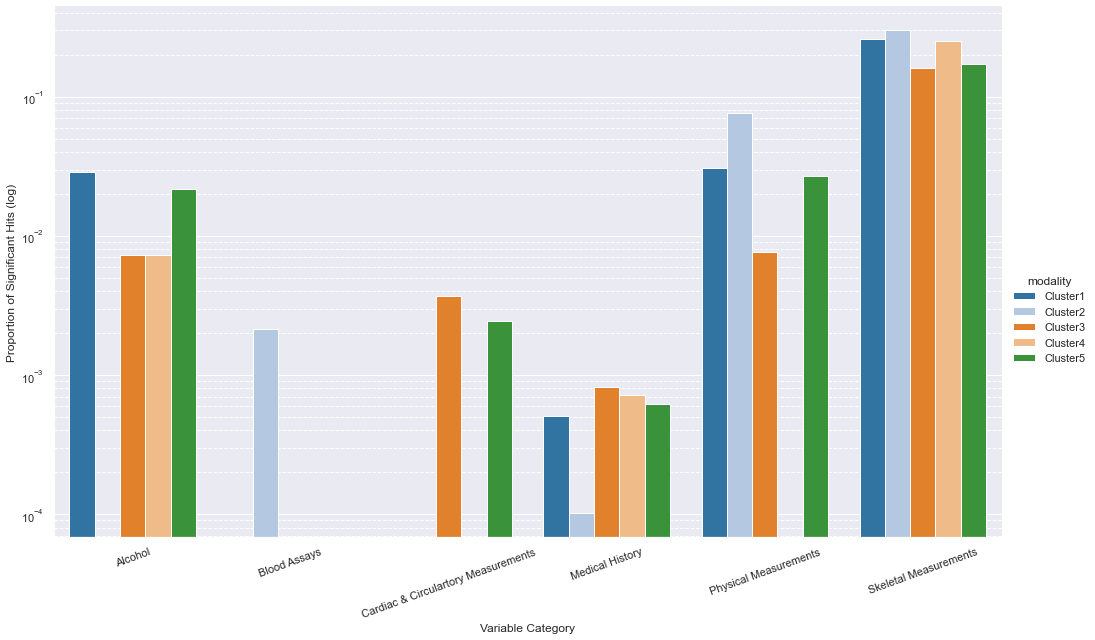

In [35]:
plt.figure(figsize=(16, 9.6))
sns.factorplot(x='var_name', y='var_hits', hue='modality', data=df_dct, kind='bar', height=8, 
               aspect=1.75, log=True, palette='tab20')
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)